On commence par introduire les librairies et morceaux de code que l'on va utiliser: la fonction GeneralRK4 est prise du TP précédent et calcul, pour une fonction $g:(t,x)\in\R\times \R^p\to\R^p$, la solution à l'équation $\dot{x}(t)=g(t,x(t))$ où $x:\R\to\R^p$, sous la condition initiale $x(0)=x_{init}$, jusqu'au temps final $T_{fin}$, avec un nombre de pas $N$ et la méthode de Runge-Kutta d'ordre 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 240
plt.rcParams['savefig.dpi'] = 240

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
def Affichage_Champs(g, xmin,xmax,ymin,ymax,N):
    #g: fonction qui definit le champs de vecteurs
    #xmin,xmax: intervalle d'abscisses affichees
    #ymin,ymax: intervalle d'ordonnees affichees
    #N: nombre de pas de discretisation
    x=np.zeros([N+1,N+1])
    y=np.zeros([N+1,N+1])
    u=np.zeros([N+1,N+1])
    v=np.zeros([N+1,N+1])#initialisation de quatres tableaux indexes sur [0,N]x[0,N]
    for i in range(N+1):#boucle for qui parcourt i=0,1,2,...,N
        for j in range(N+1):#idem pour j=0,1,2,..,N
            x[i,j],y[i,j]=xmin+(xmax-xmin)*i/N,ymin+(ymax-ymin)*j/N#abscisse et ordonnees du point associe a (i,j)
            u[i,j],v[i,j]=g(x[i,j],y[i,j])#valeur du champs de vecteur en (x[i,j],y[i,j])
    u=u*(ymax-ymin)/(xmax-xmin)#Changement d'echelle.
    u,v=u/np.sqrt(0.01+u**2+v**2),v/np.sqrt(0.01+u**2+v**2)#Normalisation du champs de vecteur: cela permet de rendre plus visible la direction.
    plt.quiver(x,y,u,v)#affichage le champs de vecteur: cette fonction trace le vecteur (u[i,j],v[i,j]) base en (x[i,j],y[i,j]), pour i,j qui parcourent [0,N]x[0,N]

def GeneralRK4(g,x_init,T_fin,N):
    T=np.linspace(0,T_fin,N+1)
    dt=T_fin/N
    dim=np.size(x_init)
    X=np.zeros([N+1,dim])
    X[0,:]=x_init
    for i in range(N):
        k1=g(T[i],X[i])
        k2=g(T[i]+dt/2,X[i]+k1*dt/2)
        k3=g(T[i]+dt/2,X[i]+k2*dt/2)
        k4=g(T[i]+dt,X[i]+k3*dt)
        X[i+1]=X[i]+dt*(k1+2*k2+2*k3+k4)/6
    return X



# Exercice 1

1) On commence par diviser par la masse pour réécrire l'équation sous la forme 
$$\dot{v}(t)=g-\frac{k}{m}v(t)^2 $$
La fonction $f:x\mapsto g-\frac{k}{m}x^2$ vérifie $f(0)=0$: autrement dit, la vitesse de chute augemente avec le temps (sans surprise). Il y a maintenant deux possibilité: soit $f(x)$ reste strictement positive pour $x\geq 0$ et donc la vitesse tend vers l'infini, soit $f$ change de signe. Pour vérifier cela on résout

$$f(x)=0\Leftrightarrow \frac{k}{m}x^2=g\Leftrightarrow x^2=\frac{mg}{k}\Leftrightarrow x=\pm \sqrt{\frac{mg}{k}}$$

Donc $f(x)$ s'annule en $x=\sqrt{\frac{mg}{k}}$: la vitesse $v(t)$ tend donc vers cette valeur quand $t\to +\infty$: on l'appelle la vitesse terminale.

2) La distance totale parcourue entre les temps $0s$ et $116s$ est $9570-640=8930m$. Sa vitesse moyenne est donc $8930/116\approx 77 m.s^{-1}$.

3) On approxime la chute, en laissant libre le paramètre $k$. En parallèle du calcul de $v(t)$, on calcule la distance parcourue par l'équation différentielle $\dot{x}(t)=v(t)$ (avec $x(0)=0$).

In [2]:
g=9.8
m=118.4
Tf=116
D_real=9570-640


def calcul_chute(k,N):
    dt=Tf/N
    x=np.zeros(N+1)
    v=np.zeros(N+1)
    for i in range(N):
        v[i+1]=v[i]+dt*(g-(k/m)*v[i]**2)
        x[i+1]=x[i]+dt*v[i]
    return x,v

def affichage_chute(k,N):
    T=np.linspace(0,Tf,N+1)
    x,v=calcul_chute(k,N)
    print('Avec le paramètre k=',k,', on obtient:')
    print('Distance de chute calculée :',x[N])
    print('Distance de chute réelle :',D_real)
    plt.plot(T,v)
    plt.xlabel('t')
    plt.ylabel('v(t)')


On commence par l'afficher pour différentes valeur de $k$.

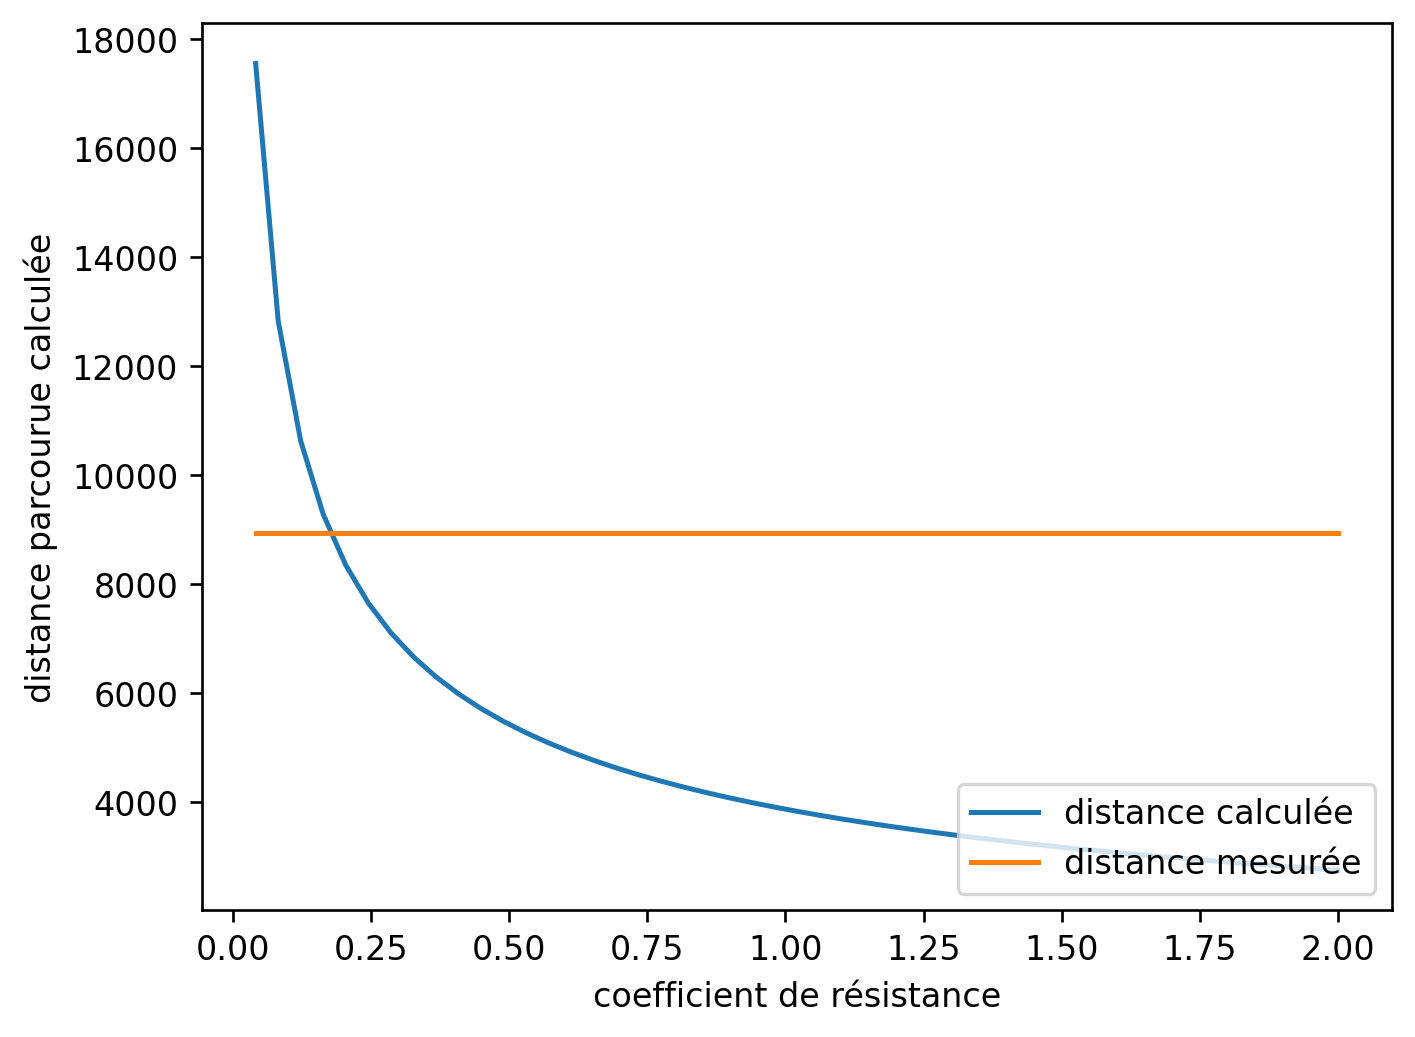

In [3]:
K=np.linspace(0,2,50)[1:]#On enlève à la main k=0
D=np.zeros(len(K))
for i in range(len(K)):
    x,v=calcul_chute(K[i],10000)
    D[i]=x[10000]
plt.plot(K,D,label='distance calculée')
plt.plot(K,np.zeros(len(K))+D_real,label='distance mesurée')
plt.xlabel('coefficient de résistance')
plt.ylabel('distance parcourue calculée')
plt.legend(loc='lower right')


On observe que, conformément à l'intuition, plus les effets de la résistance de l'air sont fort, plus la distance parcourue diminue. De plus le paramètre $k$ qui fait correspondre la distance mesurée à l'observation semble être de l'ordre de $0.2$. Pour être plus précis on peut procéder de deux manière:

-> On peut par tatonnement trouver la solution k, à plusieurs décimales près on trouve que $k\approx 0.177$ correspond.

Avec le paramètre k= 0.177 , on obtient:
Distance de chute calculée : 8928.373112317755
Distance de chute réelle : 8930


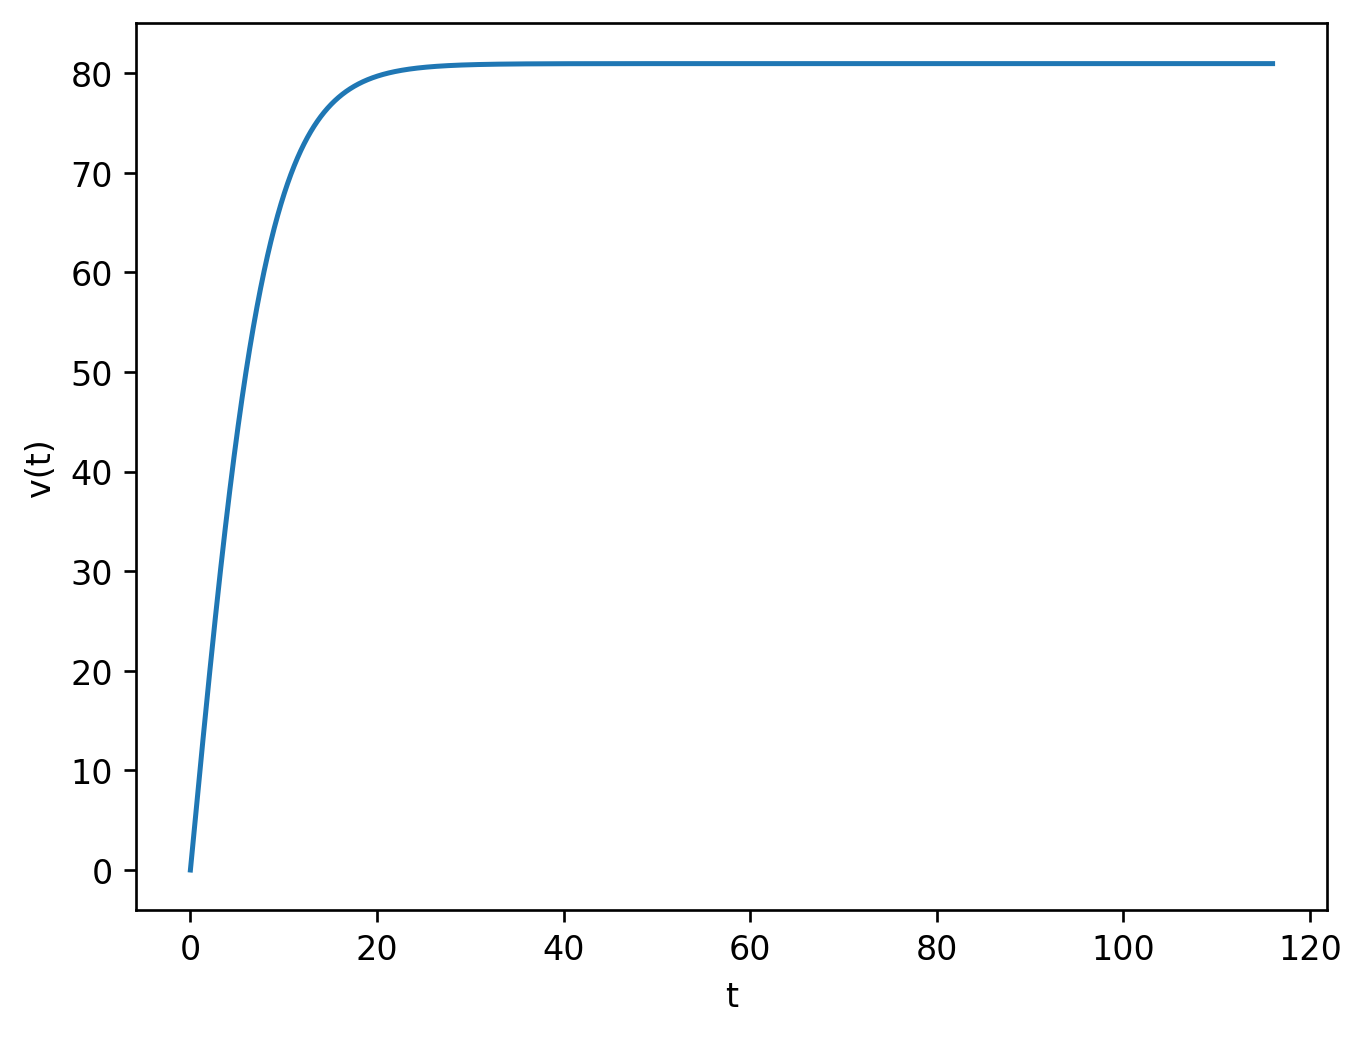

In [4]:
affichage_chute(0.177,200000)

->On peut aussi procéder par dichotomie. On fixe le nombre total de pas dans la résolution à $200000$, il ne faut pas s'attendre à faire une dichotomie plus précise que de l'ordre de 1/200000 (on peut aussi utiliser une méthode d'approximation plus rapide, comme dans le TP précédent).

In [5]:
def calc_dist_chute(k):
    x,v=calcul_chute(c,200000)
    return x[-1]

a=0.1
b=0.2
c=(a+b)/2
Da=calc_dist_chute(a)
Dc=calc_dist_chute(c)
while b-a>0.00001:
    if (Da-D_real)*(Dc-D_real)<0:
        b=c
    else:
        a=c
        Da=Dc
    c=(a+b)/2
    Dc=calc_dist_chute(c)
print('On trouve ',a,'<','k<',b," associé à une distance calculée d'environ ",Dc)


On trouve  0.1769287109375 < k< 0.176934814453125  associé à une distance calculée d'environ  8930.005230582357


Dans les deux cas on trouve $k\approx 0.177$, et donc une vitesse terminale de $\sqrt{\frac{mg}{k}}\approx 81 m.s^{-1}$. De plus en traçant la vitesse du parachutiste au cours du temps, on peut noter que celui-ci atteint sa vitesse terminale très tôt dans la chute.

Autre méthode: on peut montrer par le calcul que $x(t)=\frac{m}{k}\log\left(\cosh\left(\sqrt{\frac{gk}{m}}t\right)\right)$: cela dispense de faire le calcul par méthode d'Euler explicite.

# Exercice 2

1) Dans le modèle de Lotka-Volterra, on supposait que les proies et les prédateurs suivaient des modèle d'évolution de population exponentiels, de la forme $\dot{p}(t)=kp(t)$ pour $k=-c<0$ pour les prédateurs, et $k=a>0$ pour les proies. Cela implique en particulier que la population de proies peut croitre à l'infini à vitesse exponentielle en l'absence de prédateur.

Dans le nouveau modèle, les proies suivent (en l'absence de prédateur) une équation logistique $\dot{x}=x(1-\lambda x)$: le taux de croissance à vide $x\approx 0$ est fixé à $1$, et ce taux de croissance diminue en $x$ jusqu'à valoir $0$ pour $x=1/\lambda$, qui représente un seuil de saturation de la population (et la limite de la population de proies, en l'absence de prédateurs).

2) On va utiliser la fonction d'affichage de champs fournie dans les codes d'exemple. On prend $xmin,ymin$ strictements positifs, et $xmax,ymax$ sont trouvé en expérimentant.

On considère d'abord une petite valeur de lambda

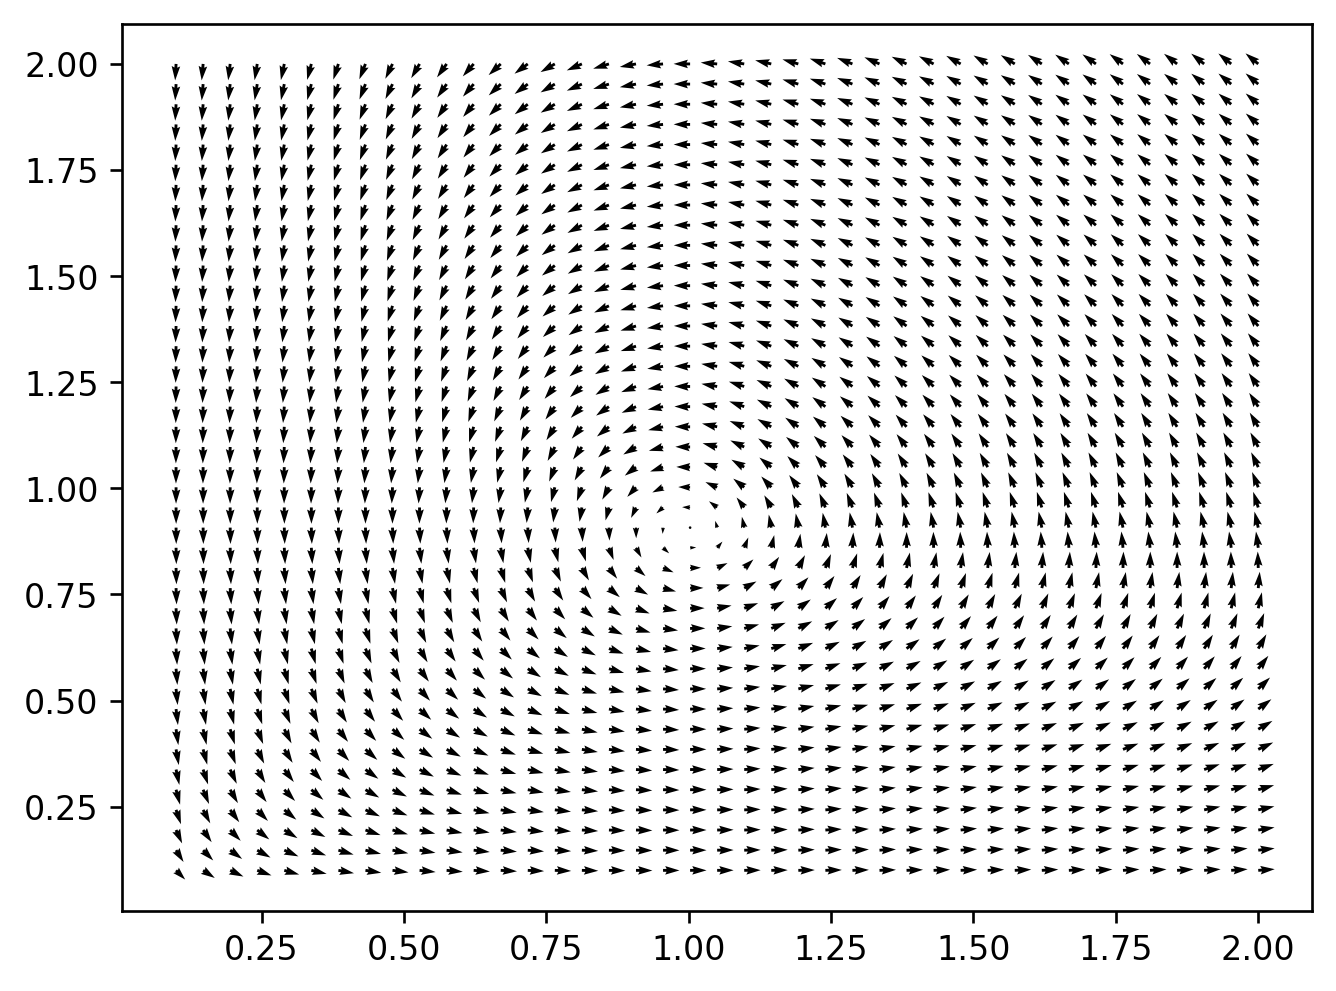

In [6]:
def Lotka(c,lam,x,y):
    return (x*(1-y-lam*x),c*y*(x-1))

valeur_lam=0.1
Affichage_Champs(lambda x,y:Lotka(1,valeur_lam,x,y), 0.1,2,0.1,2,40)


Le profil ressemble essentiellement à celui de Lotka-Volterra (sans surprise, puisqu'on en a fait une petite perturbation).
Puis une valeur plus grande:

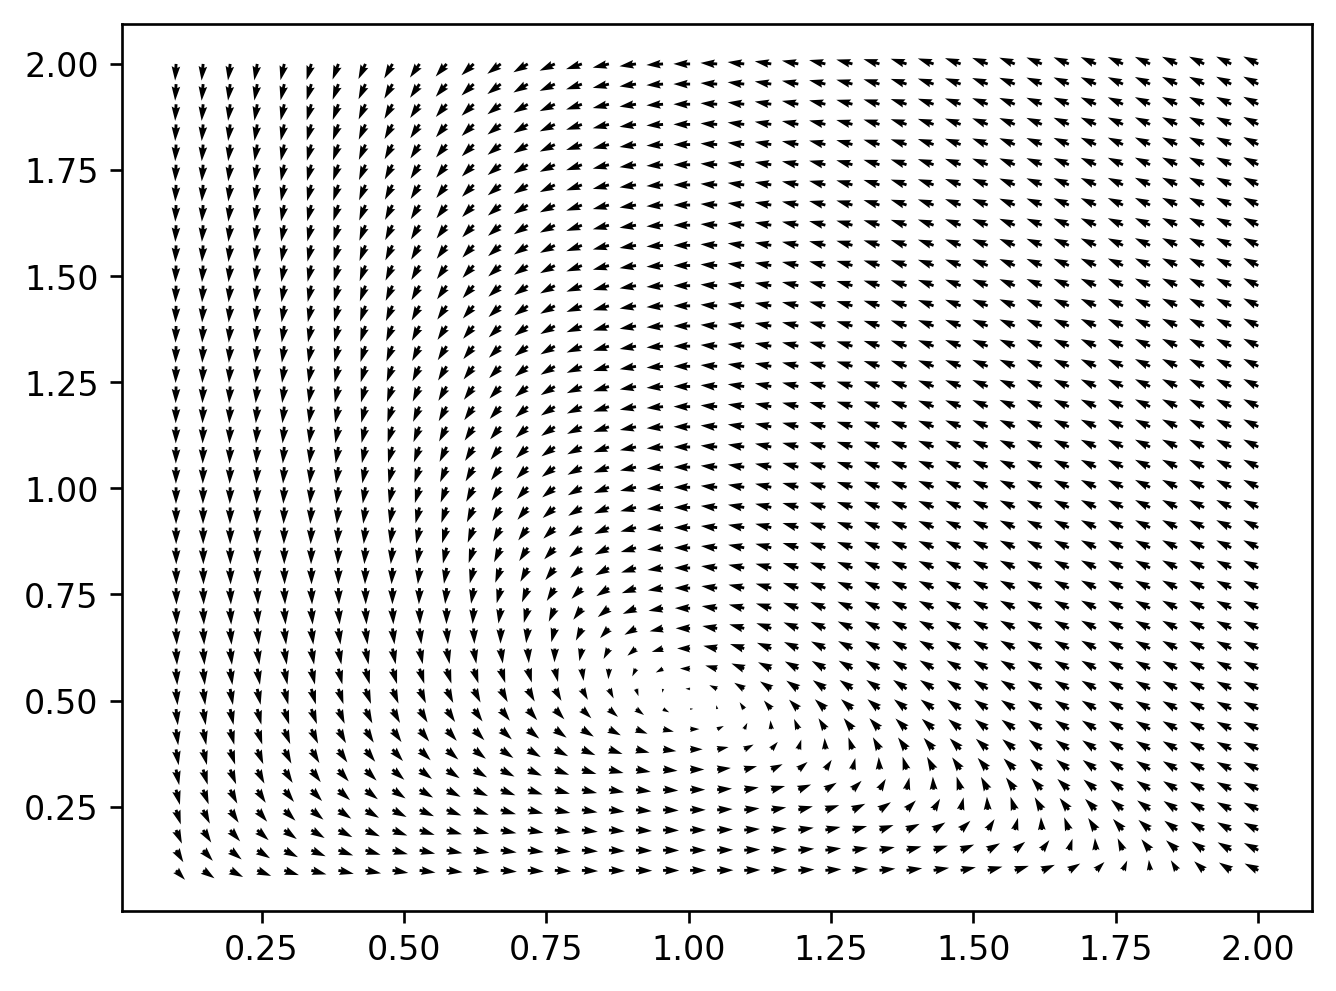

In [7]:

valeur_lam=0.5
Affichage_Champs(lambda x,y:Lotka(1,valeur_lam,x,y), 0.1,2,0.1,2,40)

On observe que le point d'équilibre semble s'approcher de l'axe des abscisses (et donc, le nombre de prédateur au point d'équilibre semble tendre vers $0$). Pour y voir clair on peut prendre lambda plus grand:

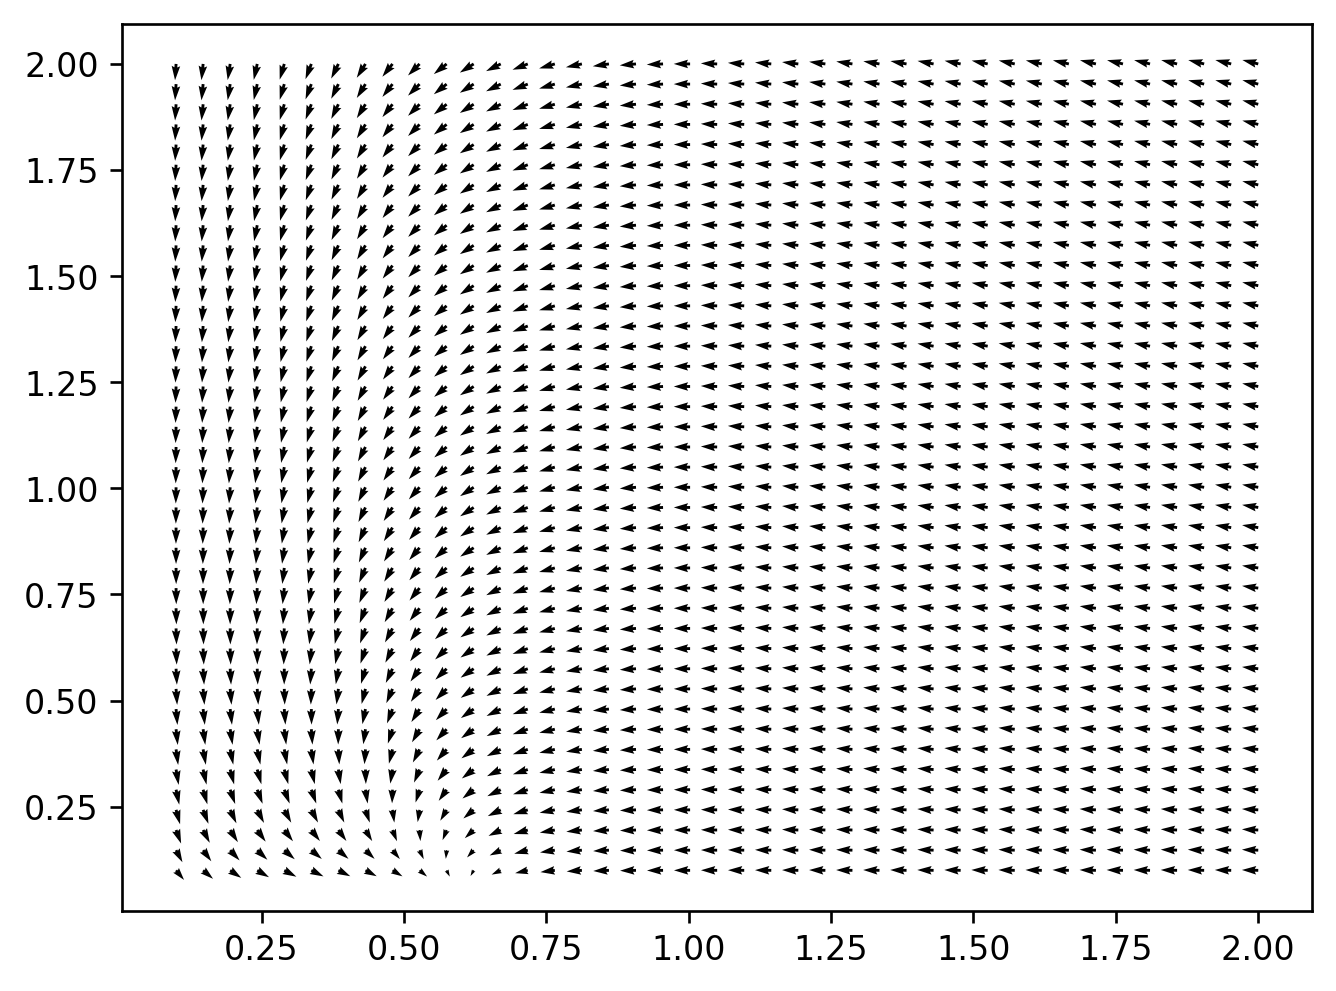

In [8]:
valeur_lam=1.5
Affichage_Champs(lambda x,y:Lotka(1,valeur_lam,x,y), 0.1,2,0.1,2,40)

4) On cherche les points $(x,y)\in\R^2$ tels que $x$ et $y$ sont positifs, et 


$$
0=x(1- y-\lambda x)\\
0=cy(x-1)
$$

On part de la deuxième équation, qui laisse deux possibilités:
- $y=0$: dans ce cas la première équation devient $0=x(1-\lambda x)$, qui admet $x=0,1/\lambda$ comme solutions. On a donc trouvé deux points d'équilibres $(0,0),(1/\lambda,0)$, qui correspondent à des populations nulles, ou a une population de prédateur éteinte et une population de proie saturée.
- $x=1$. Dans ce cas la première équation devient $0=1-\lambda -y$, donc $y=1-\lambda$: $(1,1-\lambda)$ est bien un point d'équilibre, mais il correspond à des population positives si et seulement si $\lambda\leq 1$.

Ainsi selon la valeur de $\lambda$ il y a deux ou trois points d'équilibres, correspondants à l'extinction des deux populations $(0,0)$, l'extinction des prédateur avec saturation des proies $(1/\lambda,0)$, et lorsque $\lambda<1$ la coexistence des proies et des prédateurs $(1,1-\lambda)$.


5) On fixe $c=1$. On commence par simuler le cas où $\lambda$ est petit. Comme condition initiale, on prend un point aléatoirement dans $[1,2]^2$.

Population au temps final:  [0.99998499 0.80002096]
Population au temps final:  [0.99999104 0.80003372]
Population au temps final:  [1.00001675 0.80004437]
Population au temps final:  [1.00001217 0.80003772]
Population au temps final:  [1.00002066 0.80004548]


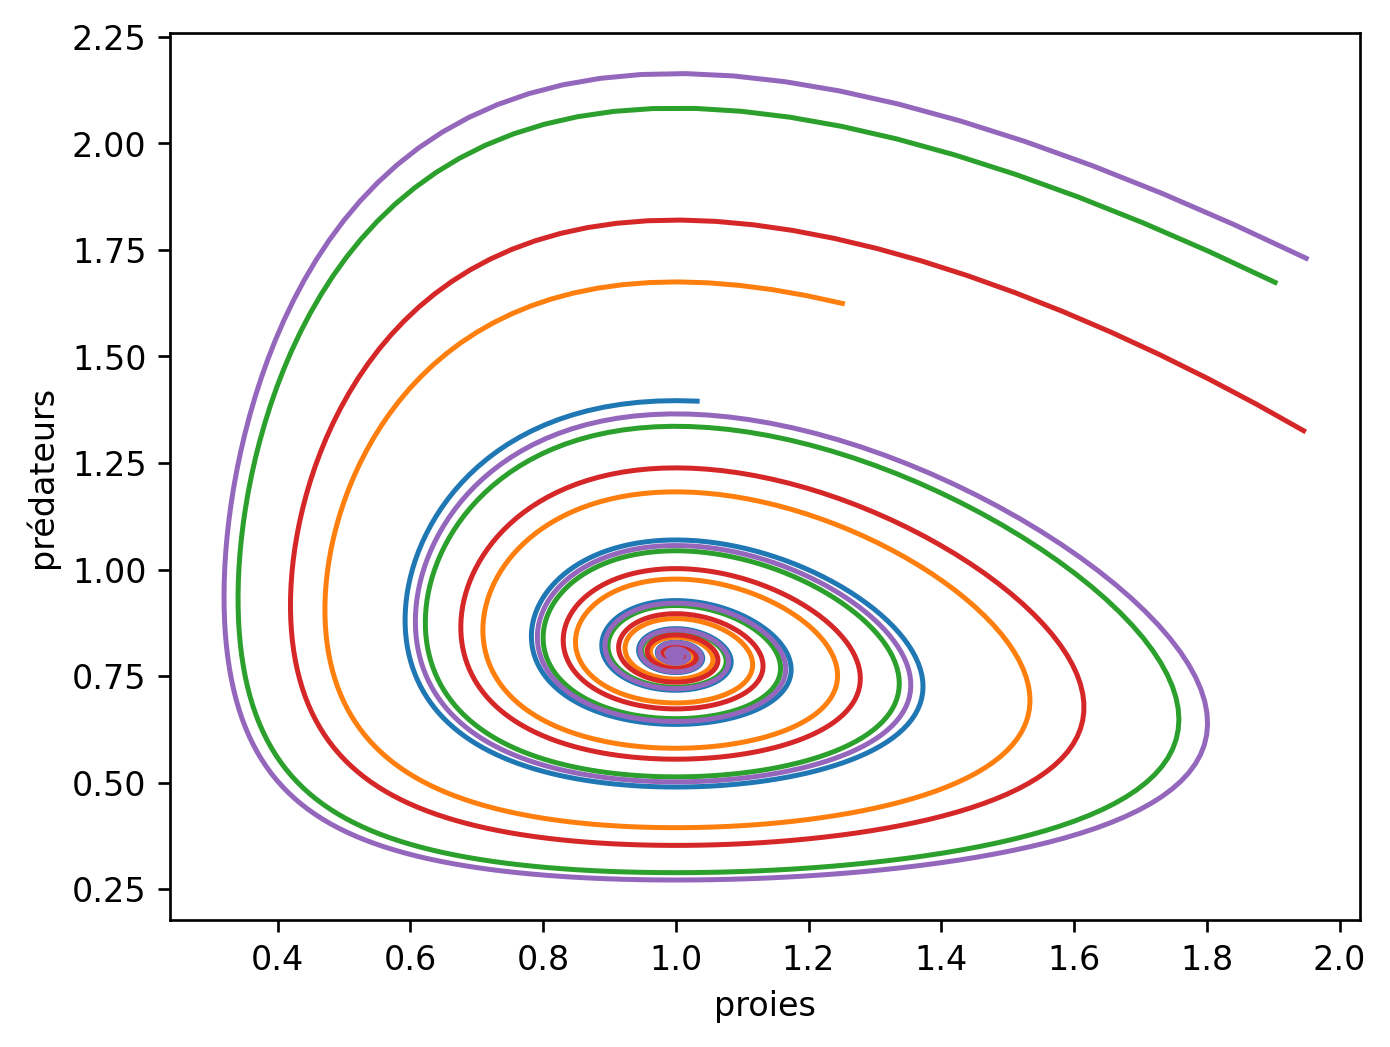

In [9]:
def ex2_calcul_sol(c,lam,Tf,N):
    return GeneralRK4(lambda t,X:np.array([X[0]*(1-X[1]-lam*X[0]),c*X[1]*(X[0]-1)]),1+np.random.random(2),Tf,N)

def ex2_affichage_sol(c,lam,Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex2_calcul_sol(c,lam,Tf,N)
    plt.plot(X[:,0],X[:,1])
    plt.xlabel('proies')
    plt.ylabel('prédateurs')
    print('Population au temps final: ',X[N])

for i in range(5):
    ex2_affichage_sol(1,0.2,100,2000)

Dans ce premier cas, la population tend vers le point d'équilibre correspondant à une coexistence. On test maintenant $\lambda>1$:

Population au temps final:  [8.33333327e-01 6.69550279e-09]
Population au temps final:  [8.33333325e-01 8.13041746e-09]
Population au temps final:  [8.33333326e-01 7.77676635e-09]
Population au temps final:  [8.33333326e-01 7.65035279e-09]
Population au temps final:  [8.33333325e-01 8.11919788e-09]


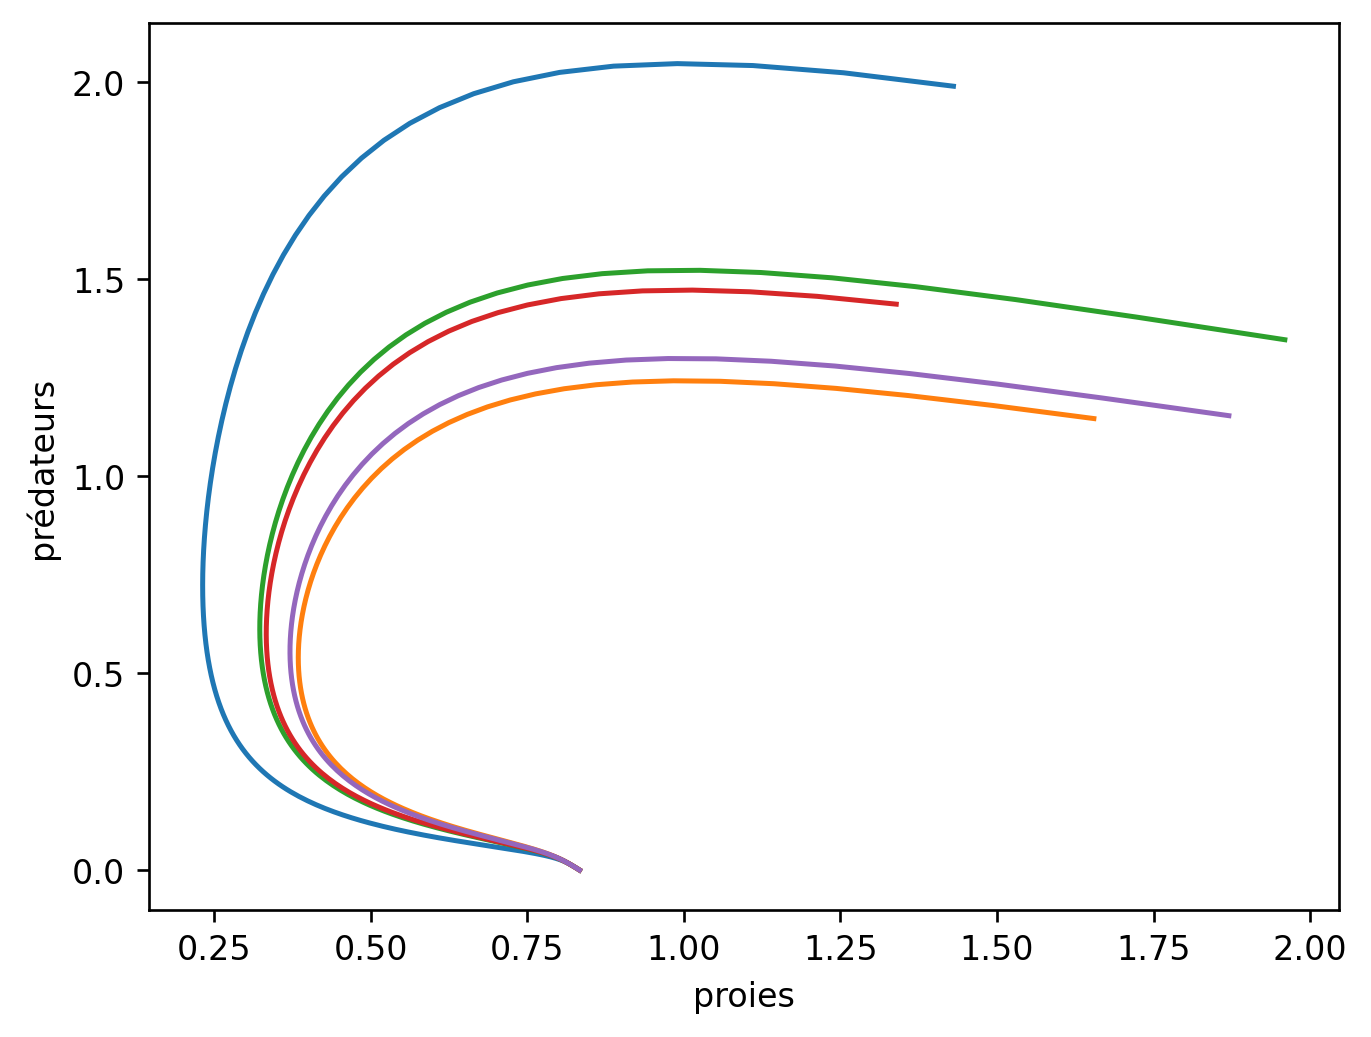

In [10]:
for i in range(5):
    ex2_affichage_sol(1,1.2,100,2000)

Dans ce cas la population de prédateur s'éteint, et celle de proies tend vers le seuil de saturation $1/\lambda$.


# Exercice 3

1) On cherche les points $(x,y,z)\in\R^3$ (sans contraintes particulières) tels que 

$$
\begin{cases}0&=\sigma(y-x)\\ 0&=\rho x-y-xz\\ 0&=xy-\beta z
\end{cases}
$$

Où $\sigma,\rho,\beta$ sont des paramètres strictement positifs. La première équation donne $y=x$. La seconde devient $x(\rho -1 -z)=0$, il y a alors deux cas:
- $x=0$, dans ce cas $y=0$ et la troisième équation donne $z=\beta xy=0$. Réciproquement $(0,0,0)$ est bien un point d'équilibre.

- $x\neq 0$, dans ce cas la deuxième équation donne $z=\rho-1$. La troisième équation donne $z=\beta xy$, en remplaçant la valeur de $z$ et en substituant $y=x$ cela donne 
$x^2=\frac{\rho -1}{\beta}$.
Si $\rho<1$ il n'y a pas de solutions. Si $\rho=1$ cela correspond à $x=0$, qui a été traité ci-dessus. Si $\rho>1$, alors cela donne $x=\pm \sqrt{\frac{\rho-1}{\beta}}$ On en déduit les deux points 
$$ \left(\sqrt{\frac{\rho-1}{\beta}},\sqrt{\frac{\rho-1}{\beta}},\rho-1\right)\text{ et }\left(\sqrt{\frac{\rho-1}{\beta}},\sqrt{\frac{\rho-1}{\beta}},\rho-1\right)$$



Dans notre cas, $\rho=28>1$, et il y a donc trois points d'équilibres, donnés par
$$(0,0,0),\  \left(\sqrt{\frac{\rho-1}{\beta}},\sqrt{\frac{\rho-1}{\beta}},\rho-1\right)\text{ et }\left(\sqrt{\frac{\rho-1}{\beta}},\sqrt{\frac{\rho-1}{\beta}},\rho-1\right)$$

2) On utilise la fonction GeneralRK4

In [11]:
rho=28
sigma=10
beta=8/3


def ex3_calcul_sol(Xinit,Tf,N):
    return GeneralRK4(lambda t,X:np.array([sigma*(X[1]-X[0]), rho*X[0]-X[1]-X[0]*X[2] , X[0]*X[1]-beta*X[2] ]),Xinit,Tf,N)


3)

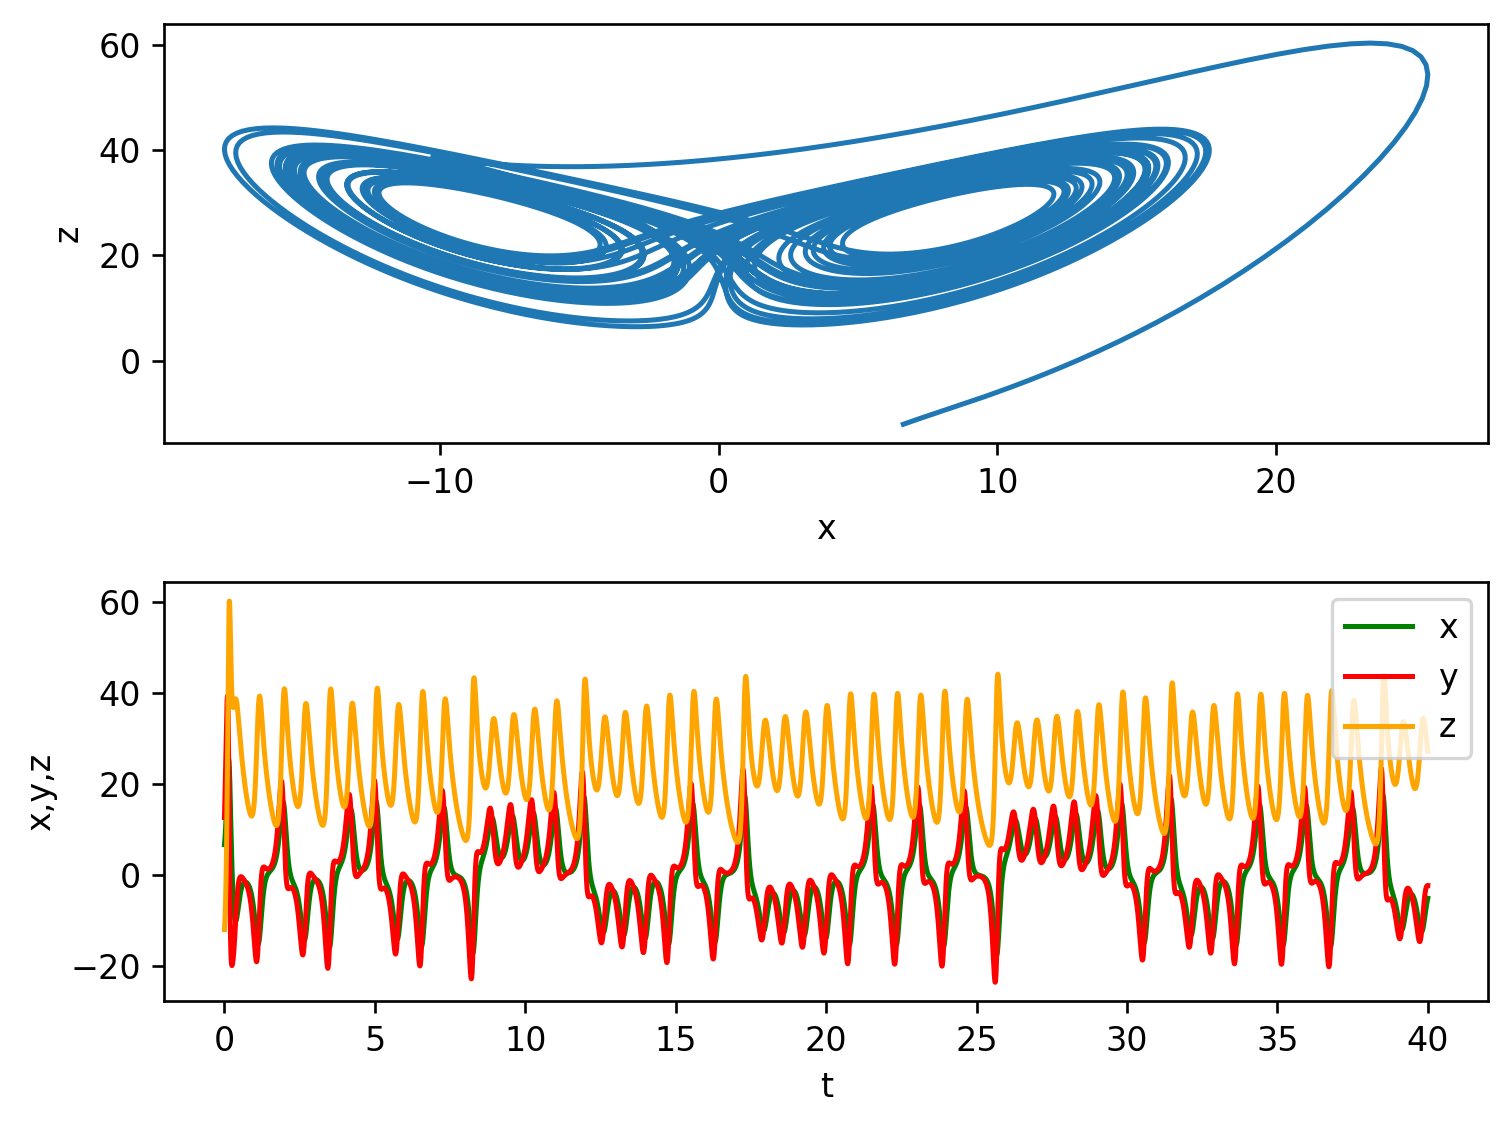

In [12]:

def ex3_affichage_sol(Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex3_calcul_sol(40*np.random.random(3)-20,Tf,N)
    plt.subplot(211)
    plt.plot(X[:,0],X[:,2])
    plt.xlabel('x')
    plt.ylabel('z')
    plt.subplot(212)
    plt.plot(T,X[:,0],color='green',label='x')
    plt.plot(T,X[:,1],color='red',label='y')
    plt.plot(T,X[:,2],color='orange',label='z')
    plt.legend(loc='upper right')
    plt.xlabel('t')
    plt.ylabel('x,y,z')
    plt.tight_layout()

ex3_affichage_sol(40,10000)

On note déjà que les fonction $x(t)$ et $y(t)$ semblent pratiquement confondues: afficher le graphe $(x,z)$ ou $(y,z)$ donnerait essentiellement le même résultat. 
Le comportement des solutions est différent de ce que l'on a pu observer dans tous les système précédents: la solution ne converge visiblement pas vers un des trois points critiques, elle ne diverge pas (les solutions restent essentiellement bornées entre $-30$ et $50$), et ses oscillations ne semblent pas périodiques (elles ne se répètent pas).

4) On fait maintenant la même chose, en utilisant la fonction affichage_3d

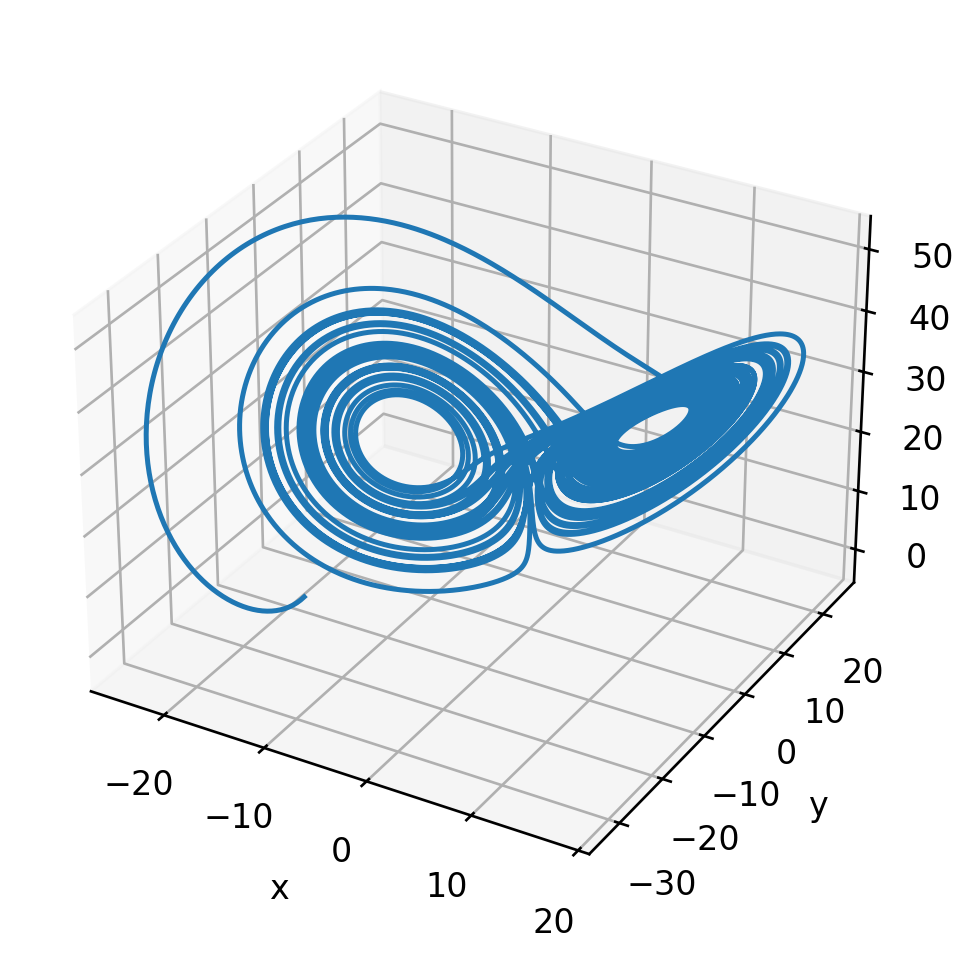

In [13]:

def affichage3d(X,Y,Z):#X,Y,Z sont trois tableaux de taille identique N
    ax = plt.axes(projection='3d')
    ax.plot3D (X,Y,Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()



def ex3_affichage_sol_3d(Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex3_calcul_sol(40*np.random.random(3)-20,Tf,N)
    affichage3d(X[:,0],X[:,1],X[:,2])

ex3_affichage_sol_3d(50,50000)

5)

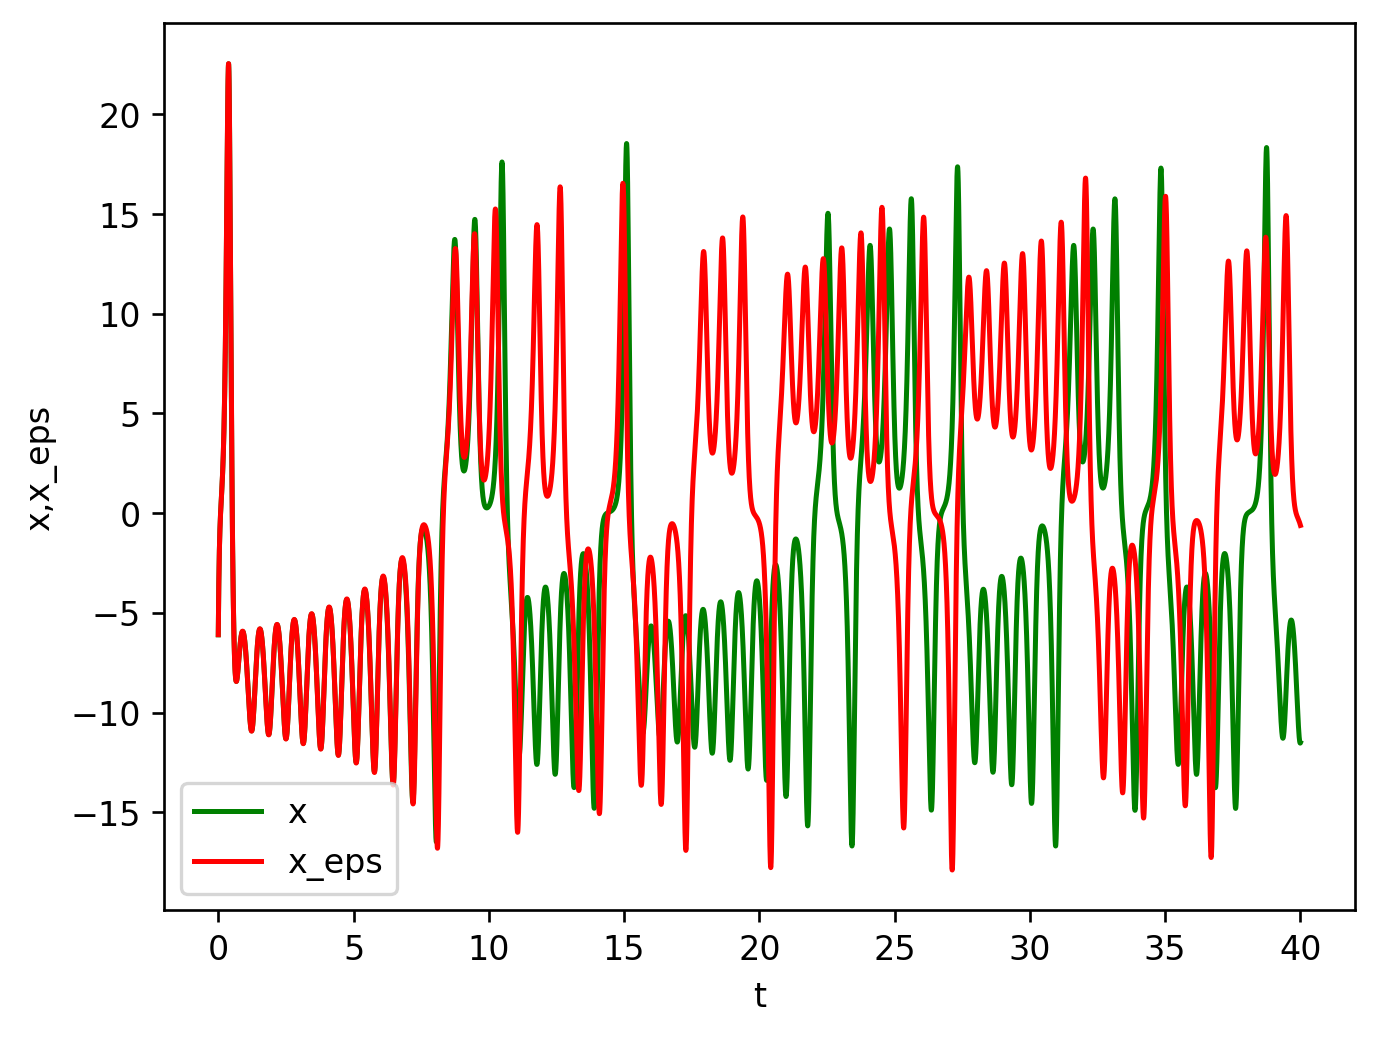

In [14]:
def ex3_comparaison(eps,Tf,N):
    T=np.linspace(0,Tf,N+1)
    xinit=40*np.random.random(3)-20
    X=ex3_calcul_sol(xinit,Tf,N)
    X2=ex3_calcul_sol(xinit+np.array([eps,0,0]),Tf,N)
    plt.plot(T,X[:,0],color='green',label='x')
    plt.plot(T,X2[:,0],color='red',label='x_eps')
    plt.xlabel('t')
    plt.ylabel('x,x_eps')
    plt.legend(loc='lower left')

ex3_comparaison(0.01,40,50000)

Les solutiosn semblent se séparer completement après un certain temps où elles sont indiscernables. Faisont maintenant des exemples avec eps plus petit

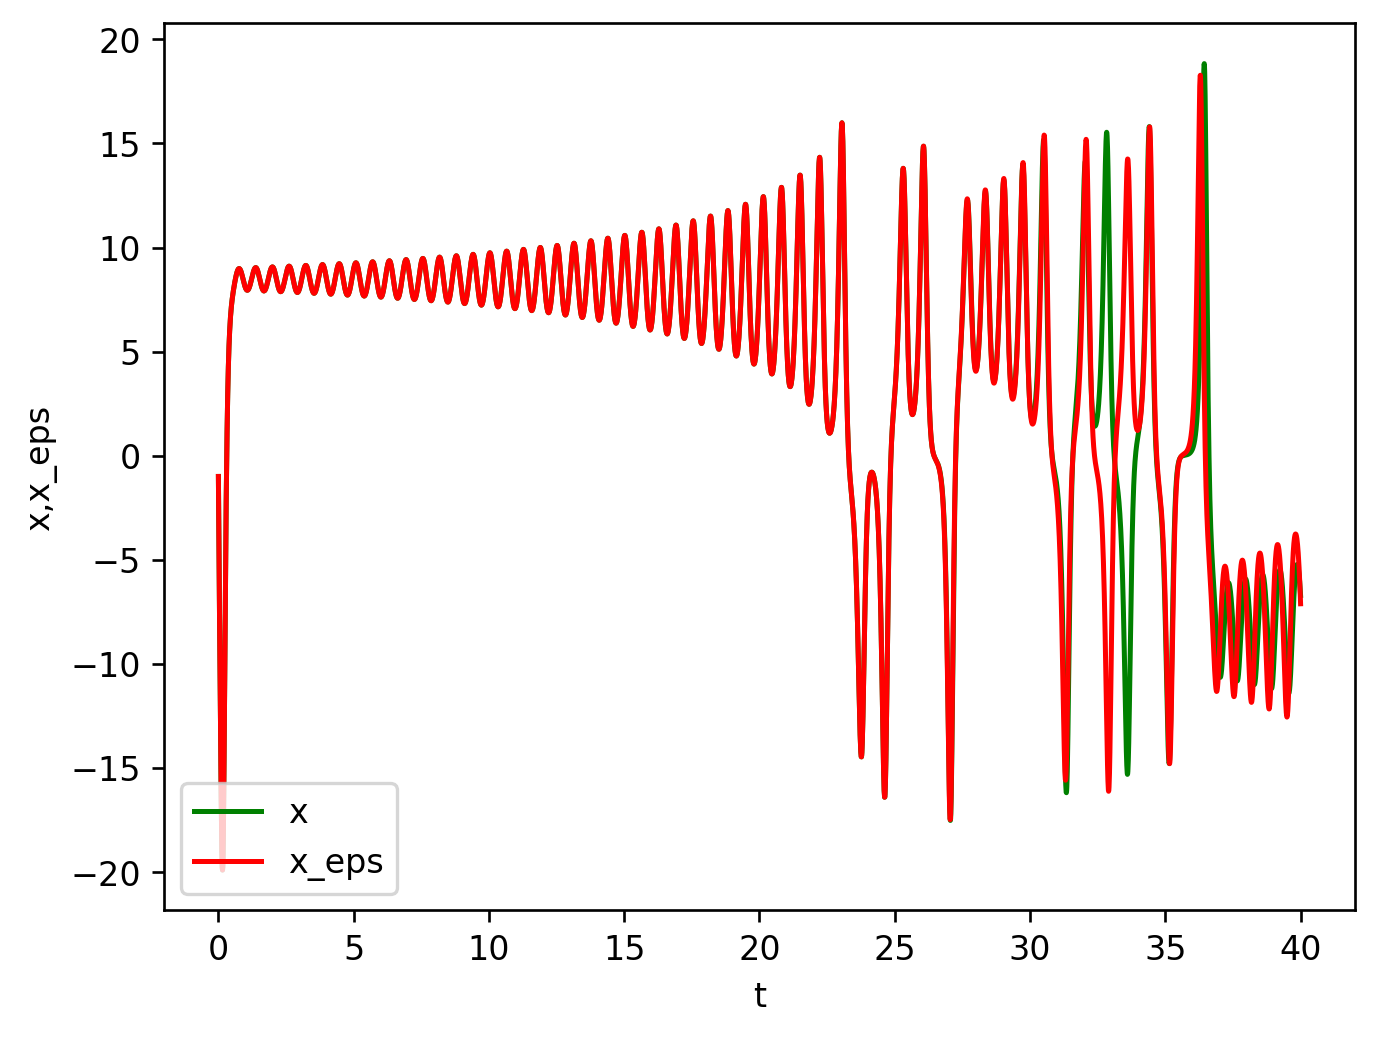

In [15]:
ex3_comparaison(0.001,40,5000)

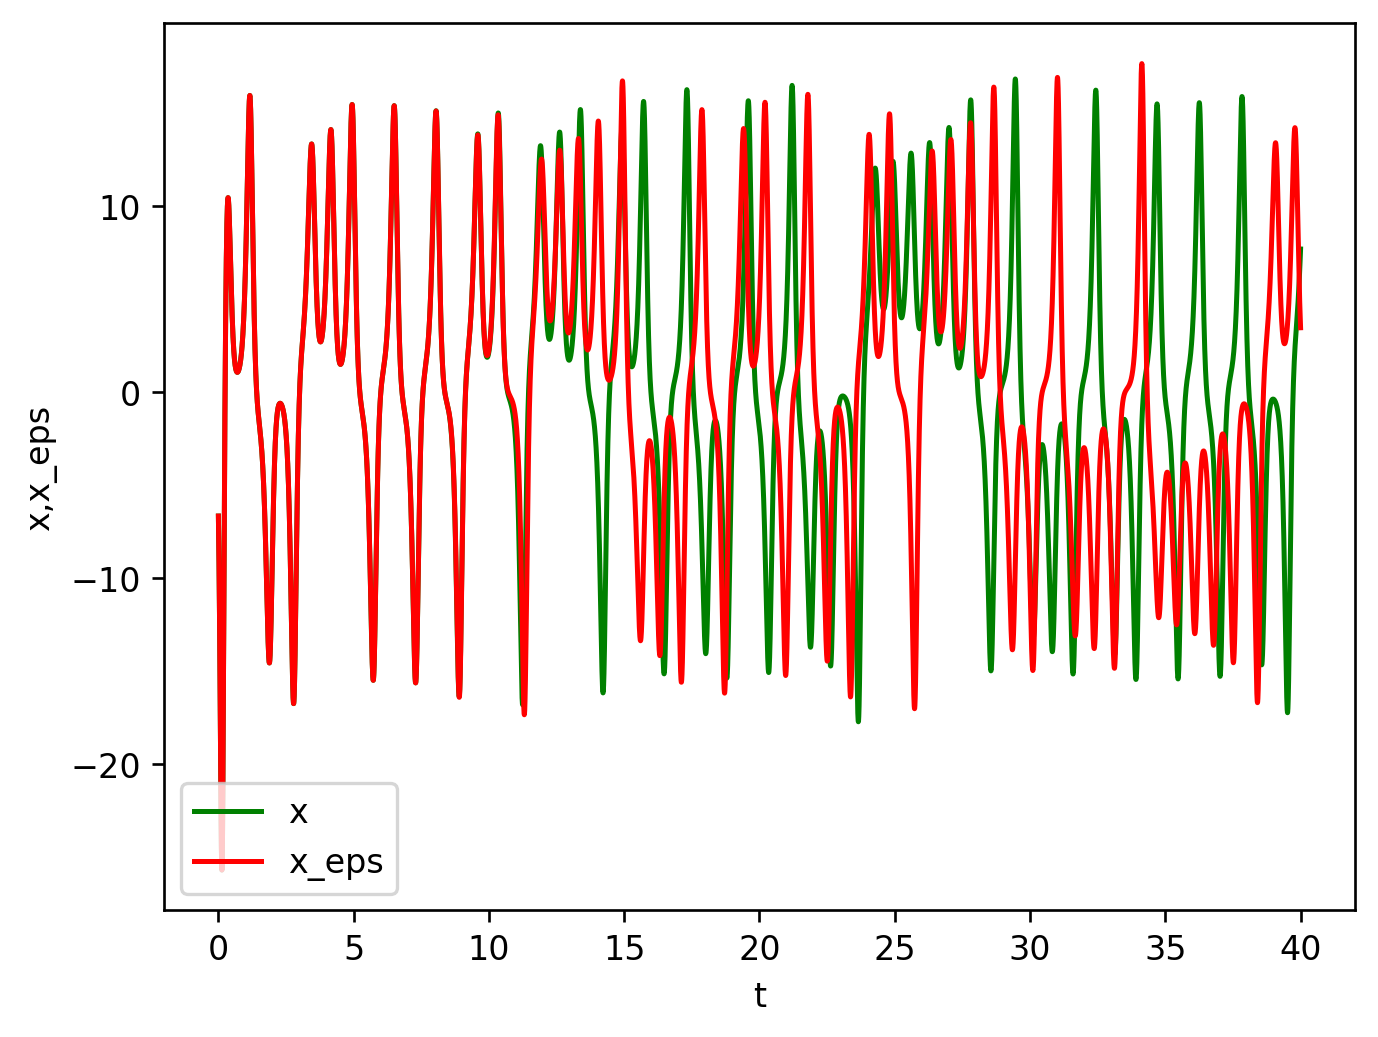

In [16]:
ex3_comparaison(0.0001,40,50000)

Dans tous les cas les deux solutions semblent se séparer au bout d'un certain temps, jusqu'à n'avoir plus rien à voir.

6) Pour observer de plus près ce phénomène, on trace le logarithme de l'écart entre deux solutions. On part cette fois d'une perturbation encore plus petite: on prend $\epsilon=10^{-5}$.

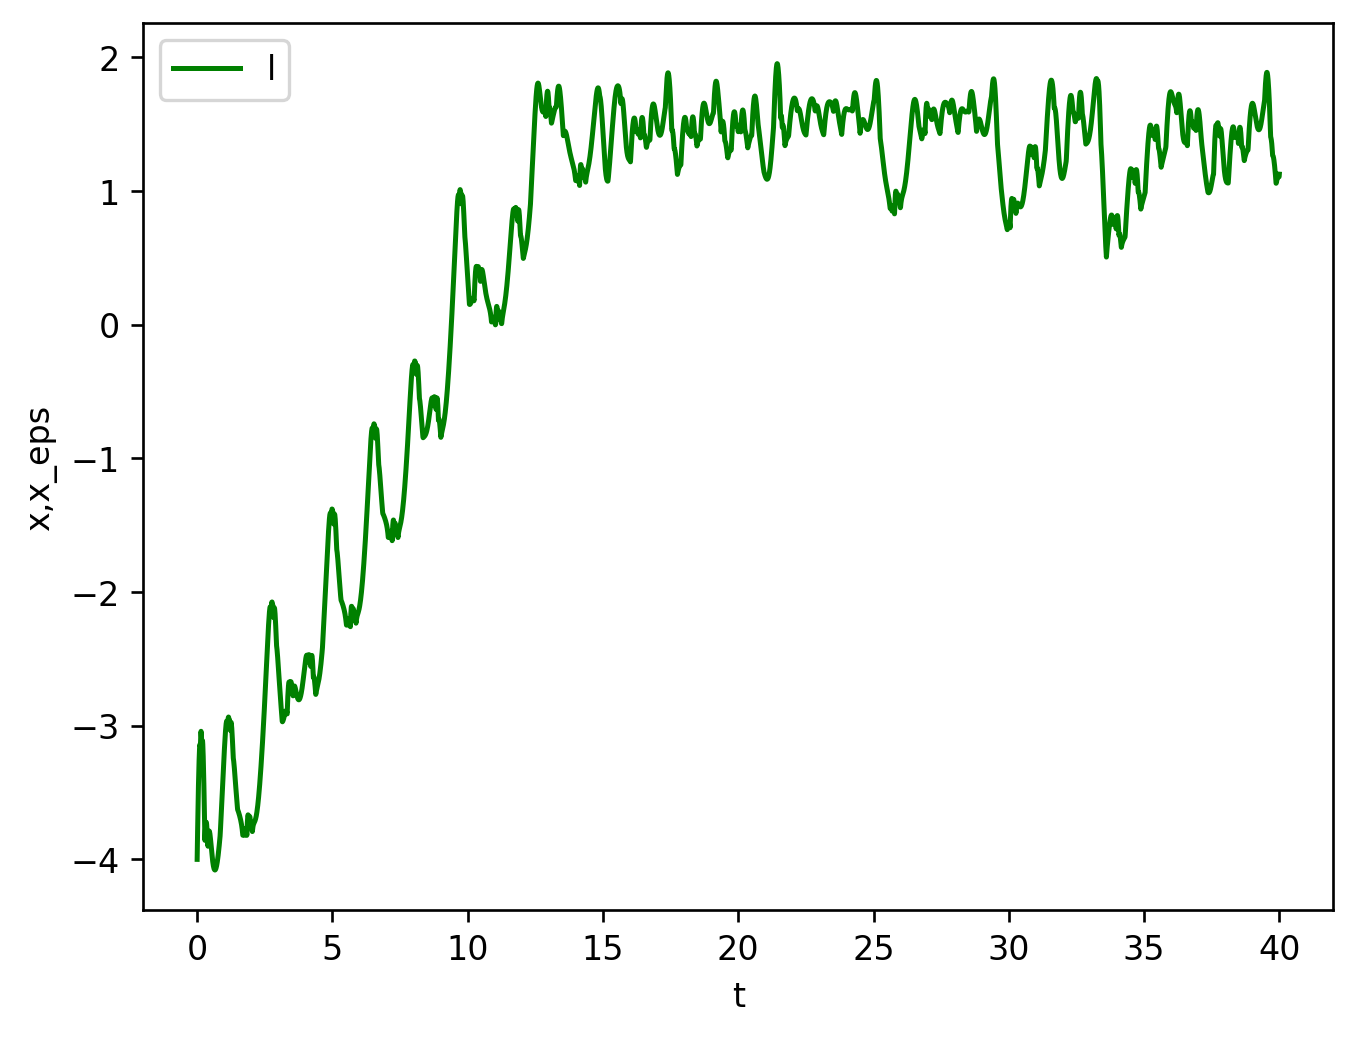

In [17]:
def ex3_comparaison_graph(eps,Tf,N):
    T=np.linspace(0,Tf,N+1)
    xinit=40*np.random.random(3)-20
    X=ex3_calcul_sol(xinit,Tf,N)
    X2=ex3_calcul_sol(xinit+np.array([eps,0,0]),Tf,N)
    plt.plot(T,np.log(np.abs(X[:,0]-X2[:,0])+np.abs(X[:,1]-X2[:,1])+np.abs(X[:,2]-X2[:,2]))/np.log(10),color='green',label='log(erreur)')
    plt.xlabel('t')
    plt.ylabel('x,x_eps')
    plt.legend('lower left')

ex3_comparaison_graph(0.0001,40,5000)

On observe (très grossierrement) 2 phases: d'abord, tant que l'écart est petite (plus petite que 0.1), alors le logarithme de l'écart semble augmenter (avec des oscillations) de manière à peu près linéaire. Puis dans la deuxième phase, l'écart entre les deux solutions va osciller entre les ordres $10^0=1$, et $10^2=100$.